<h1><center>CARDIOVASCULAR DISEASES RISK PREDICTION</center></h1>
<h2><center>ABHIJITH DAMERUPPALA</center></h2>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from imblearn.over_sampling import SMOTE

In [2]:
data = pd.read_csv("./CVD_cleaned.csv")

In [3]:
data.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [4]:
data.isna().all()

General_Health                  False
Checkup                         False
Exercise                        False
Heart_Disease                   False
Skin_Cancer                     False
Other_Cancer                    False
Depression                      False
Diabetes                        False
Arthritis                       False
Sex                             False
Age_Category                    False
Height_(cm)                     False
Weight_(kg)                     False
BMI                             False
Smoking_History                 False
Alcohol_Consumption             False
Fruit_Consumption               False
Green_Vegetables_Consumption    False
FriedPotato_Consumption         False
dtype: bool

In [5]:
data.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

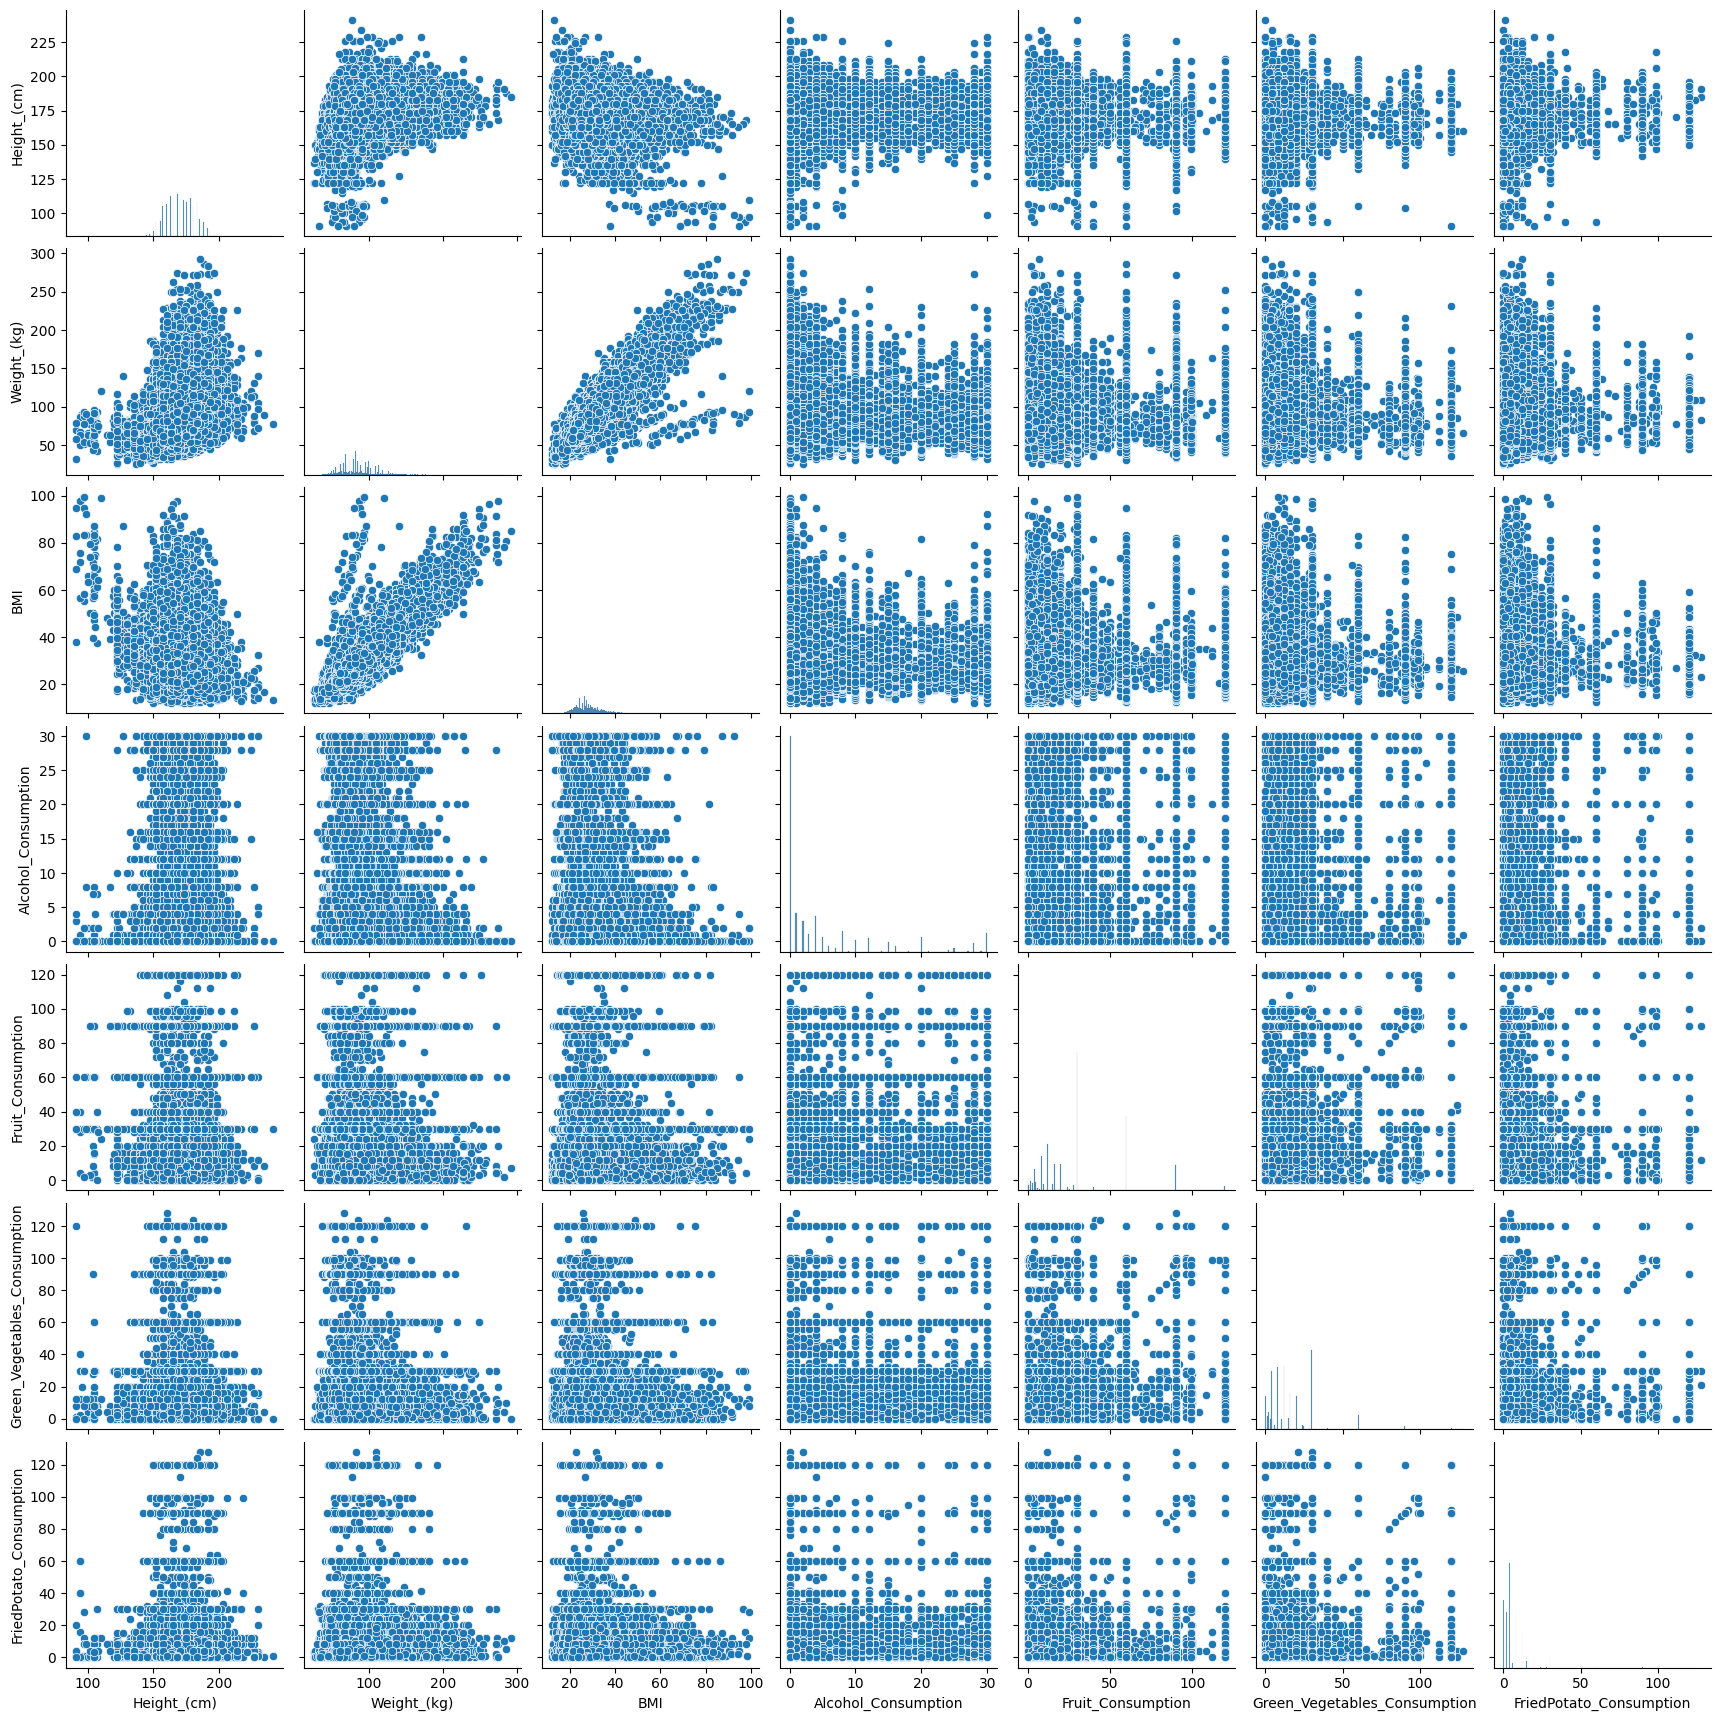

In [7]:
sns.pairplot(data)

In [8]:
data.shape

(308854, 19)

C:\Users\Abhijith\AppData\Local\Temp\ipykernel_14240\1637340540.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')


<AxesSubplot: title={'center': 'Heatmap of numeric columns in the dataset'}>

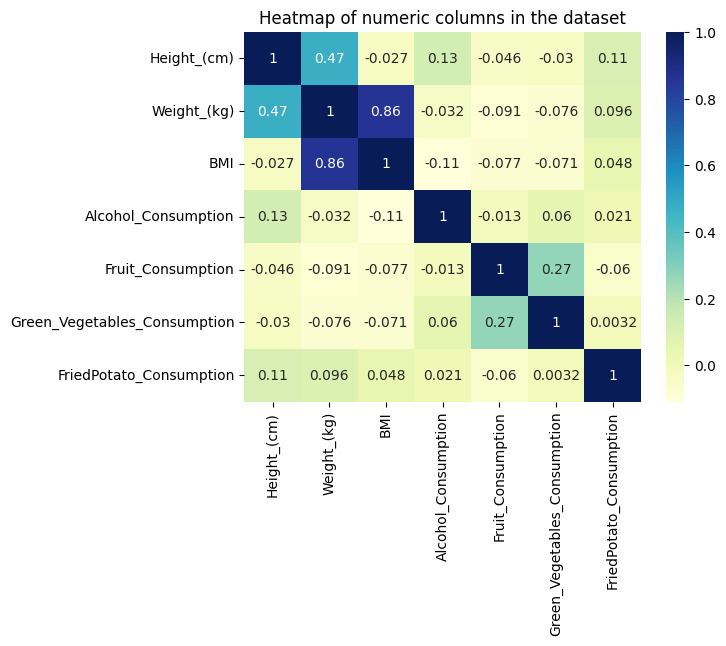

In [6]:
plt.title("Heatmap of numeric columns in the dataset")
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')


In [10]:
data.corr()

C:\Users\Abhijith\AppData\Local\Temp\ipykernel_9496\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
Height_(cm),1.000000,0.472186,-0.027408,0.128835,-0.045911,-0.030148,0.108795
Weight_(kg),0.472186,1.000000,0.859699,-0.032373,-0.090612,-0.075904,0.096351
BMI,-0.027408,0.859699,1.000000,-0.108684,-0.076611,-0.070640,0.048366
Alcohol_Consumption,0.128835,-0.032373,-0.108684,1.000000,-0.012562,0.060053,0.020543
Fruit_Consumption,-0.045911,-0.090612,-0.076611,-0.012562,1.000000,0.270430,-0.060311
Green_Vegetables_Consumption,-0.030148,-0.075904,-0.070640,0.060053,0.270430,1.000000,0.003180
FriedPotato_Consumption,0.108795,0.096351,0.048366,0.020543,-0.060311,0.003180,1.000000


<AxesSubplot: title={'center': 'Distribution of Age Category and Weight'}, xlabel='Age_Category', ylabel='Weight_(kg)'>

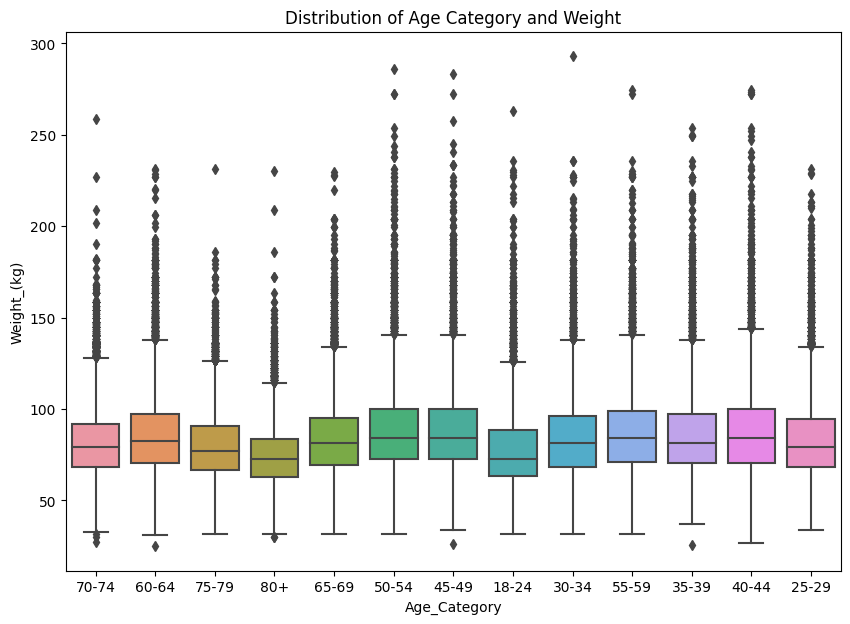

In [7]:
plt.figure(figsize=(10,7))
plt.title("Distribution of Age Category and Weight")
sns.boxplot(x='Age_Category', y='Weight_(kg)', data=data)

C:\Users\Abhijith\AppData\Local\Temp\ipykernel_14240\3758175174.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['BMI'], shade=True, color='orange')


<AxesSubplot: title={'center': 'Kernel Density Plot of BMI in the dataset'}, xlabel='BMI', ylabel='Density'>

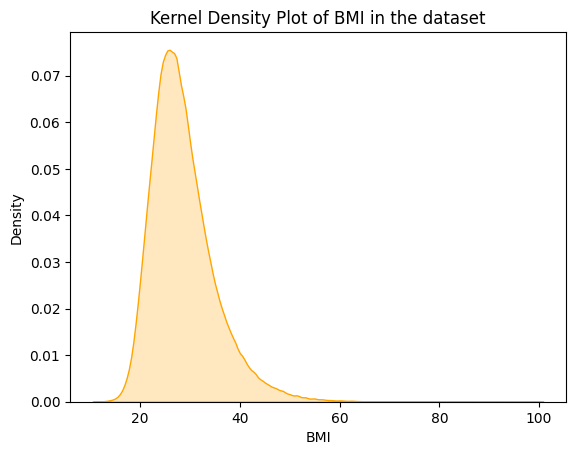

In [8]:
plt.title("Kernel Density Plot of BMI in the dataset")
sns.kdeplot(data['BMI'], shade=True, color='orange')

C:\Users\Abhijith\AppData\Local\Temp\ipykernel_14240\2710675243.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Alcohol_Consumption'], shade=True, color='purple')


<AxesSubplot: title={'center': 'KDE plot of Alcohol Consumption in the dataset'}, xlabel='Alcohol_Consumption', ylabel='Density'>

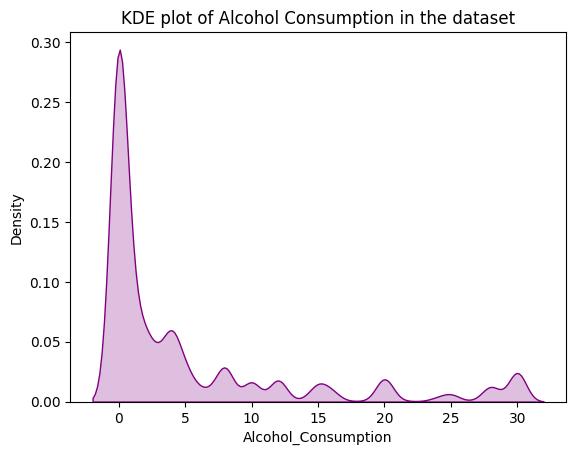

In [9]:
plt.title("KDE plot of Alcohol Consumption in the dataset")
sns.kdeplot(data['Alcohol_Consumption'], shade=True, color='purple')

<AxesSubplot: title={'center': 'Distribution of General Health of samples'}, xlabel='General_Health', ylabel='count'>

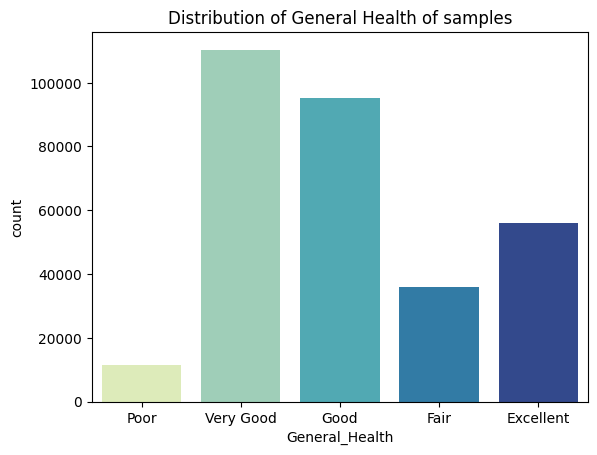

In [10]:
plt.title("Distribution of General Health of samples")
sns.countplot(data=data, x='General_Health', palette='YlGnBu')

<AxesSubplot: title={'center': 'Line plot of General Health v/s Smoking History'}, xlabel='General_Health', ylabel='Smoking_History'>

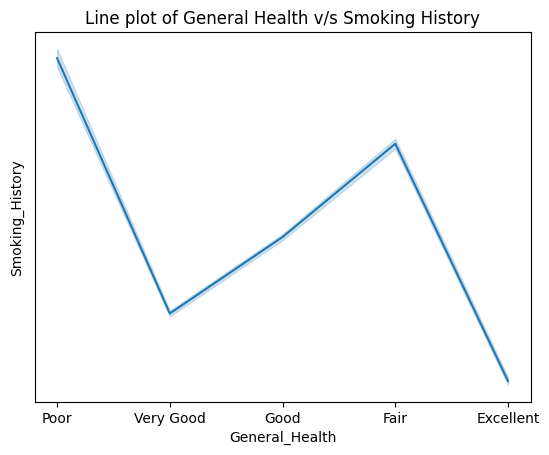

In [11]:
plt.title("Line plot of General Health v/s Smoking History")
sns.lineplot(data = data, x = 'General_Health', y = 'Smoking_History')

Removing outliers

In [57]:
clean_data = data
# Calculate IQR
Q1 = clean_data.quantile(0.25)
Q3 = clean_data.quantile(0.75)
IQR = Q3 - Q1

# Define the columns you want to check for outliers
columns = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 
           'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

# Replace outliers with the median value for each column
for col in columns:
    median = clean_data[col].median()
    clean_data[col] = np.where((clean_data[col] < (Q1[col] - 1.5 * IQR[col])) | (clean_data[col] > (Q3[col] + 1.5 * IQR[col])), 
                         median, clean_data[col])

C:\Users\Abhijith\AppData\Local\Temp\ipykernel_18160\768910663.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = clean_data.quantile(0.25)
C:\Users\Abhijith\AppData\Local\Temp\ipykernel_18160\768910663.py:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = clean_data.quantile(0.75)


Performing Encoding on the categorical features of the dataset.

In [58]:
cat_columns = ['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
                        'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 
                        'Age_Category', 'Smoking_History']
ohe = OneHotEncoder()

encoded_categorical = ohe.fit_transform(clean_data[cat_columns]).toarray()

one_hot_df = pd.DataFrame(encoded_categorical, columns = ohe.get_feature_names_out(clean_data[cat_columns].columns))

new_data = pd.concat([clean_data, one_hot_df], axis=1)
new_data = new_data.drop(cat_columns, axis=1)



In [59]:
clean_data.shape

(308854, 19)

In [60]:
new_data.shape

(308854, 50)

In [61]:
clean_data.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [62]:
new_data.head()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health_Excellent,General_Health_Fair,General_Health_Good,...,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+,Smoking_History_No,Smoking_History_Yes
0,150.0,32.66,14.54,0.0,30.0,16.0,12.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,165.0,77.11,28.29,0.0,30.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,163.0,88.45,33.47,4.0,12.0,3.0,16.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,180.0,93.44,28.73,0.0,30.0,30.0,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,191.0,88.45,24.37,0.0,8.0,4.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [63]:
new_data.columns

Index(['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption',
       'Fruit_Consumption', 'Green_Vegetables_Consumption',
       'FriedPotato_Consumption', 'General_Health_Excellent',
       'General_Health_Fair', 'General_Health_Good', 'General_Health_Poor',
       'General_Health_Very Good', 'Checkup_5 or more years ago',
       'Checkup_Never', 'Checkup_Within the past 2 years',
       'Checkup_Within the past 5 years', 'Checkup_Within the past year',
       'Exercise_No', 'Exercise_Yes', 'Heart_Disease_No', 'Heart_Disease_Yes',
       'Skin_Cancer_No', 'Skin_Cancer_Yes', 'Other_Cancer_No',
       'Other_Cancer_Yes', 'Depression_No', 'Depression_Yes', 'Diabetes_No',
       'Diabetes_No, pre-diabetes or borderline diabetes', 'Diabetes_Yes',
       'Diabetes_Yes, but female told only during pregnancy', 'Arthritis_No',
       'Arthritis_Yes', 'Sex_Female', 'Sex_Male', 'Age_Category_18-24',
       'Age_Category_25-29', 'Age_Category_30-34', 'Age_Category_35-39',
       'Age_Categor

Splitting the dataset

In [64]:
final_data = new_data.drop(columns = ['Exercise_No', 'Heart_Disease_No', 'Skin_Cancer_No', 'Other_Cancer_No', 'Depression_No', 'Arthritis_No', 'Sex_Female', 'Smoking_History_No'])

In [65]:
final_data.head()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health_Excellent,General_Health_Fair,General_Health_Good,...,Age_Category_40-44,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+,Smoking_History_Yes
0,150.0,32.66,14.54,0.0,30.0,16.0,12.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,165.0,77.11,28.29,0.0,30.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,163.0,88.45,33.47,4.0,12.0,3.0,16.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,180.0,93.44,28.73,0.0,30.0,30.0,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,191.0,88.45,24.37,0.0,8.0,4.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [66]:
feature = final_data['Heart_Disease_Yes']
final_data = final_data.drop(columns = ['Heart_Disease_Yes'])

In [67]:
final_data.columns

Index(['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption',
       'Fruit_Consumption', 'Green_Vegetables_Consumption',
       'FriedPotato_Consumption', 'General_Health_Excellent',
       'General_Health_Fair', 'General_Health_Good', 'General_Health_Poor',
       'General_Health_Very Good', 'Checkup_5 or more years ago',
       'Checkup_Never', 'Checkup_Within the past 2 years',
       'Checkup_Within the past 5 years', 'Checkup_Within the past year',
       'Exercise_Yes', 'Skin_Cancer_Yes', 'Other_Cancer_Yes', 'Depression_Yes',
       'Diabetes_No', 'Diabetes_No, pre-diabetes or borderline diabetes',
       'Diabetes_Yes', 'Diabetes_Yes, but female told only during pregnancy',
       'Arthritis_Yes', 'Sex_Male', 'Age_Category_18-24', 'Age_Category_25-29',
       'Age_Category_30-34', 'Age_Category_35-39', 'Age_Category_40-44',
       'Age_Category_45-49', 'Age_Category_50-54', 'Age_Category_55-59',
       'Age_Category_60-64', 'Age_Category_65-69', 'Age_Category_70-74',
     

In [68]:
# Splitting the data for 80-20
X_train, X_test, y_train, y_test = train_test_split(final_data, feature, test_size=0.2, random_state=42)

In [69]:
X_train.isna()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health_Excellent,General_Health_Fair,General_Health_Good,...,Age_Category_40-44,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+,Smoking_History_Yes
192601,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
196337,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
99888,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
282228,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
216188,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
259178,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
131932,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
146867,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Logistic Regression

In [19]:
LR = LogisticRegression(max_iter = 1000)
LR.fit(X_train, y_train)

C:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

We can see that there seems to be problem with convergence, lets try scaling the data using a standard scaler and perform logistic regression

In [20]:
LR = make_pipeline(StandardScaler(), LogisticRegression(max_iter = 1000))
LR.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [21]:
y_pred = LR.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9193148888637063
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.96     56774
         1.0       0.51      0.06      0.12      4997

    accuracy                           0.92     61771
   macro avg       0.72      0.53      0.54     61771
weighted avg       0.89      0.92      0.89     61771

[[56463   311]
 [ 4673   324]]


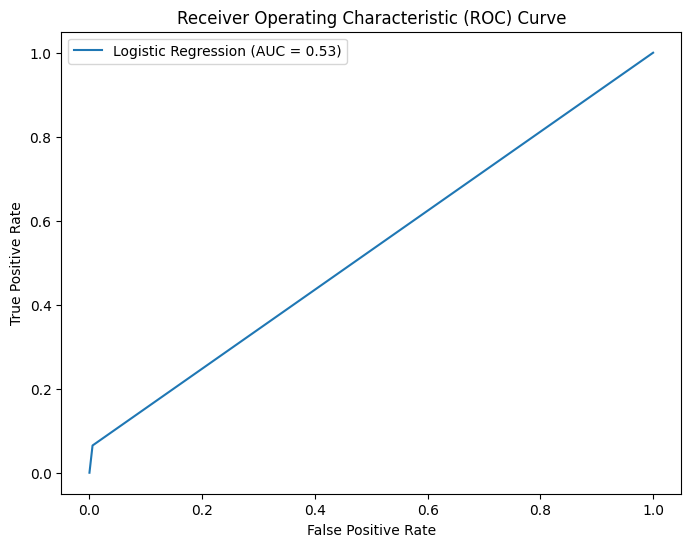

In [22]:
logistic_auc = roc_auc_score(y_test, y_pred)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % logistic_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Decision Tree Classifier

In [70]:
DT = DecisionTreeClassifier(random_state=42)
DT.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [71]:
# Predictions
y_pred = DT.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92     56774
         1.0       0.20      0.23      0.22      4997

    accuracy                           0.86     61771
   macro avg       0.57      0.58      0.57     61771
weighted avg       0.87      0.86      0.87     61771

[[52082  4692]
 [ 3829  1168]]


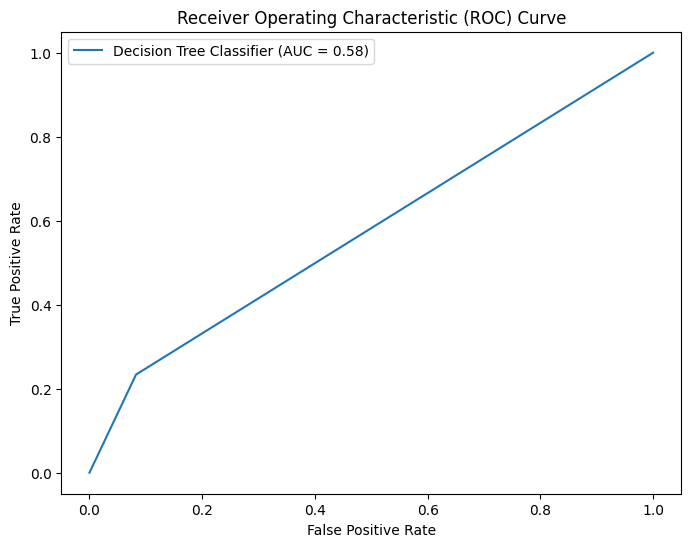

In [72]:
decision_auc = roc_auc_score(y_test, y_pred)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Decision Tree Classifier (AUC = %0.2f)' % decision_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [28]:
NB = GaussianNB()
NB.fit(X_train, y_train)

GaussianNB()

In [31]:
# Predictions
y_pred = NB.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.624467792329734
              precision    recall  f1-score   support

         0.0       0.98      0.60      0.75     56774
         1.0       0.16      0.85      0.27      4997

    accuracy                           0.62     61771
   macro avg       0.57      0.73      0.51     61771
weighted avg       0.91      0.62      0.71     61771

[[34330 22444]
 [  753  4244]]


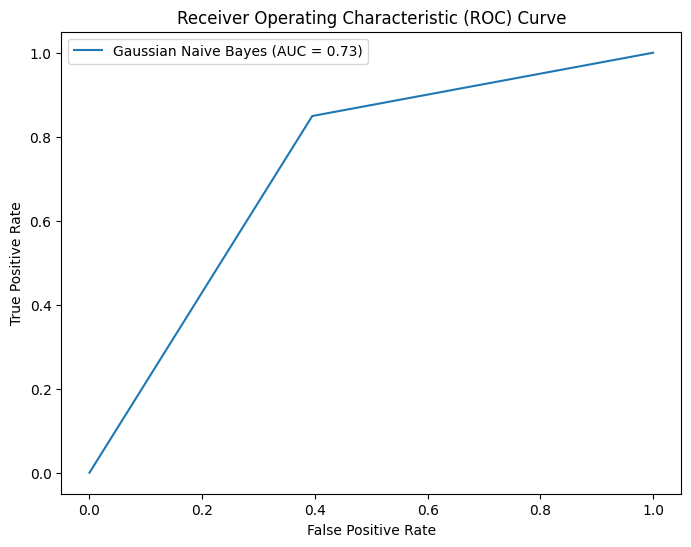

In [32]:
nb_auc = roc_auc_score(y_test, y_pred)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Gaussian Naive Bayes (AUC = %0.2f)' % nb_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [33]:
BNB = BernoulliNB()
BNB.fit(X_train, y_train)

BernoulliNB()

In [34]:
# Predictions
y_pred = BNB.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8667983357886386
              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93     56774
         1.0       0.28      0.42      0.34      4997

    accuracy                           0.87     61771
   macro avg       0.61      0.66      0.63     61771
weighted avg       0.89      0.87      0.88     61771

[[51460  5314]
 [ 2914  2083]]


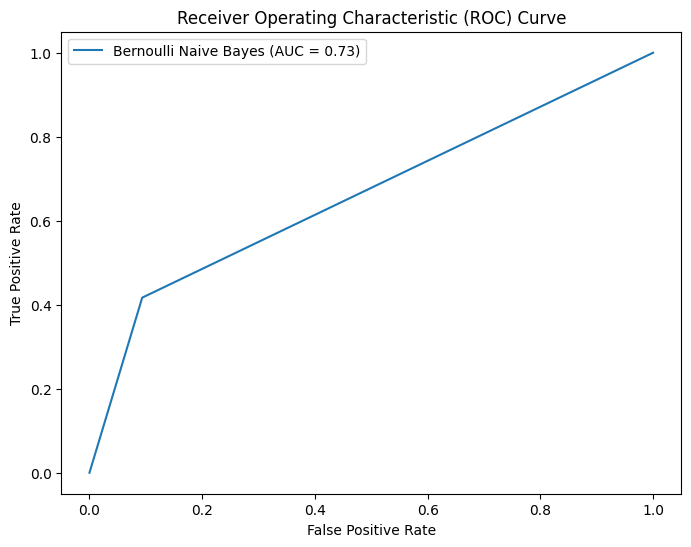

In [35]:
bnb_auc = roc_auc_score(y_test, y_pred)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Bernoulli Naive Bayes (AUC = %0.2f)' % nb_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [73]:
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(final_data, feature)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [38]:
LR = LogisticRegression(max_iter = 1000)
LR.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [39]:
# Predictions
y_pred = LR.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7770752241224439
              precision    recall  f1-score   support

         0.0       0.80      0.74      0.77     56701
         1.0       0.76      0.81      0.79     56853

    accuracy                           0.78    113554
   macro avg       0.78      0.78      0.78    113554
weighted avg       0.78      0.78      0.78    113554

[[41939 14762]
 [10552 46301]]


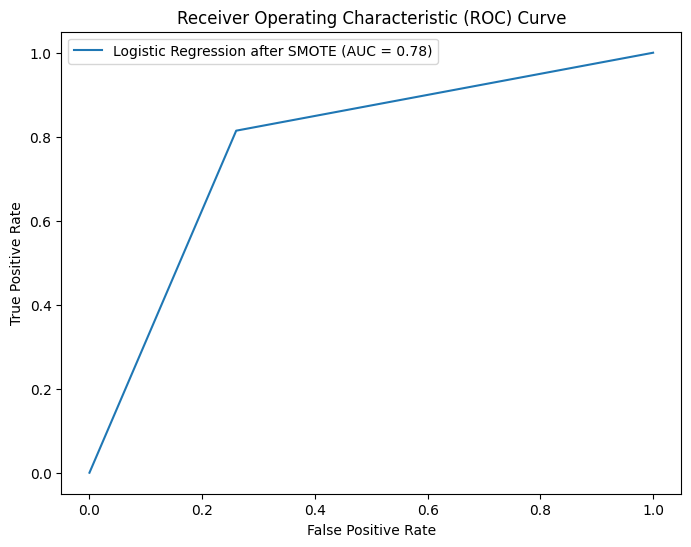

In [41]:
lr_auc = roc_auc_score(y_test, y_pred)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression after SMOTE (AUC = %0.2f)' % lr_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [75]:
DT = DecisionTreeClassifier(random_state=42)
DT.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [78]:
# Predictions
y_pred = DT.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92     56701
         1.0       0.92      0.93      0.92     56853

    accuracy                           0.92    113554
   macro avg       0.92      0.92      0.92    113554
weighted avg       0.92      0.92      0.92    113554

[[51906  4795]
 [ 3941 52912]]


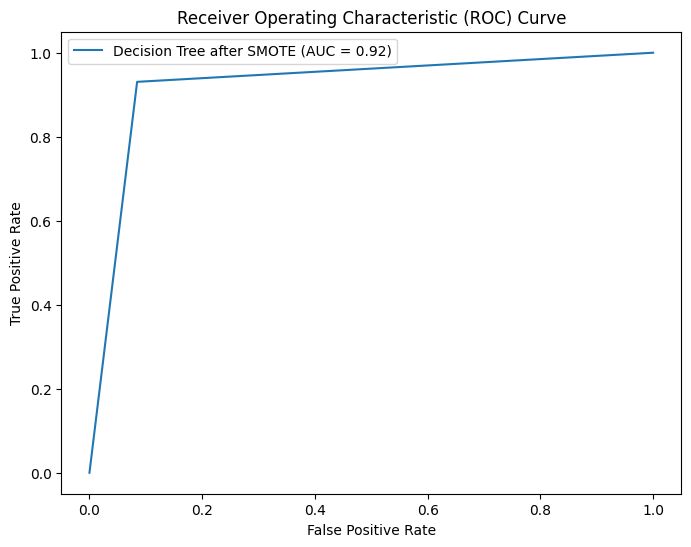

In [77]:
dt_auc = roc_auc_score(y_test, y_pred)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Decision Tree after SMOTE (AUC = %0.2f)' % dt_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [45]:
NB = GaussianNB()
NB.fit(X_train, y_train)

GaussianNB()

In [46]:
# Predictions
y_pred = NB.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7372791799496274
              precision    recall  f1-score   support

         0.0       0.84      0.58      0.69     56701
         1.0       0.68      0.89      0.77     56853

    accuracy                           0.74    113554
   macro avg       0.76      0.74      0.73    113554
weighted avg       0.76      0.74      0.73    113554

[[33136 23565]
 [ 6268 50585]]


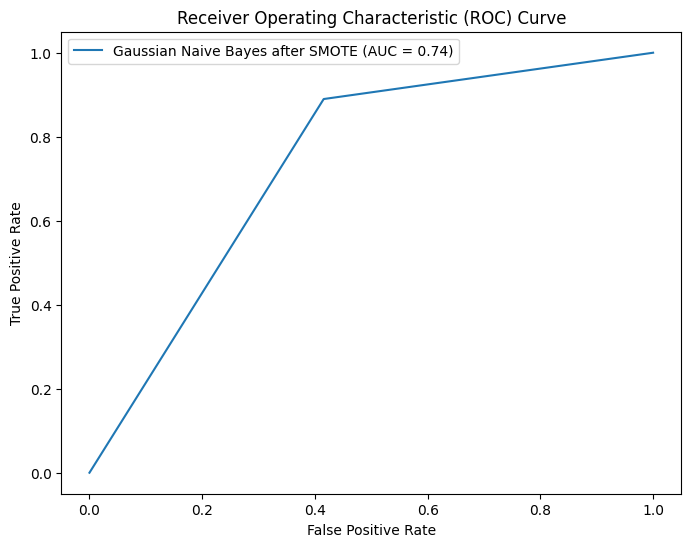

In [47]:
nb_auc = roc_auc_score(y_test, y_pred)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Gaussian Naive Bayes after SMOTE (AUC = %0.2f)' % nb_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [48]:
BNB = BernoulliNB()
BNB.fit(X_train, y_train)

BernoulliNB()

In [49]:
# Predictions
y_pred = BNB.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.82      0.85     56701
         1.0       0.83      0.89      0.86     56853

    accuracy                           0.85    113554
   macro avg       0.86      0.85      0.85    113554
weighted avg       0.86      0.85      0.85    113554

[[46432 10269]
 [ 6383 50470]]


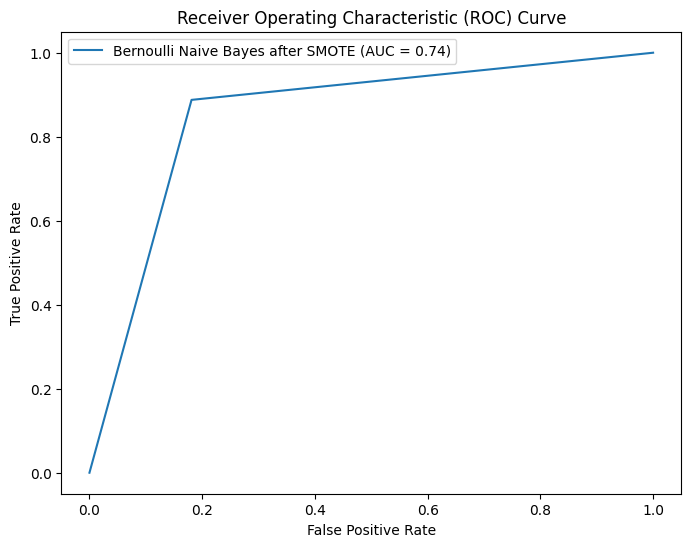

In [50]:
bnb_auc = roc_auc_score(y_test, y_pred)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Bernoulli Naive Bayes after SMOTE (AUC = %0.2f)' % nb_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()